In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

import torch
import timm

from typing import Any, Dict, List, Tuple, Optional

from einops import repeat, rearrange
from einops.layers.torch import Rearrange

from timm.models.layers import trunc_normal_
from timm.models.vision_transformer import Block
import torch.nn.functional as F


In [4]:
root_path = "../../logs/"
img = np.load(f"{root_path}img.npy")
mask = np.load(f"{root_path}mask.npy")
pred_img = np.load(f"{root_path}preds.npy")


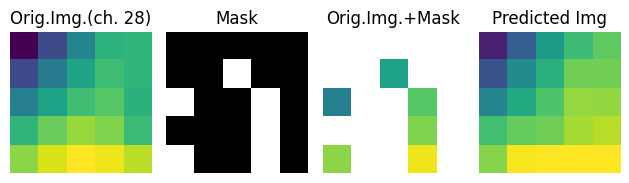

In [114]:
batch_index = random.randint(0, 1023) #1, 96, 62*
# channel_index = random.randint(0, 40) #3, 7, 1*
channel_index = 28
fig, axes = plt.subplots(1, 4)

_min, _max = np.amin(img[batch_index, channel_index, :, :]), np.amax(img[batch_index, channel_index, :, :])

img_plot = axes[0].imshow(img[batch_index, channel_index, :, :], vmin = _min, vmax = _max)
axes[1].imshow(1-mask[batch_index, channel_index, :, :], cmap='gray')
# axes[2].imshow((1-mask[batch_index, channel_index, :, :])*img[batch_index, channel_index, :, :], vmin=img_plot.get_clim()[0], vmax=img_plot.get_clim()[1])
nan_img = np.copy(img)
for row in range(img.shape[2]):
    for col in range(img.shape[3]):
        if mask[batch_index, channel_index, row, col] == 1:
            nan_img[batch_index, channel_index, row, col] = np.nan
axes[2].imshow(nan_img[batch_index, channel_index, :, :], vmin = _min, vmax = _max)
axes[3].imshow(pred_img[batch_index, channel_index, :, :], vmin = _min, vmax = _max)#, cmap='plasma')

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')

axes[0].set_title(f"Orig.Img.(ch. {channel_index})")
axes[1].set_title(f"Mask")
axes[2].set_title(f"Orig.Img.+Mask")
axes[3].set_title(f"Predicted Img")

plt.tight_layout()
plt.show()